In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20.0,10.0)
matplotlib.rcParams['image.cmap'] = 'gray'

In [4]:
image_path = '..\\shapes.jpg'
image = cv2.imread(image_path)

In [5]:
imageGray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

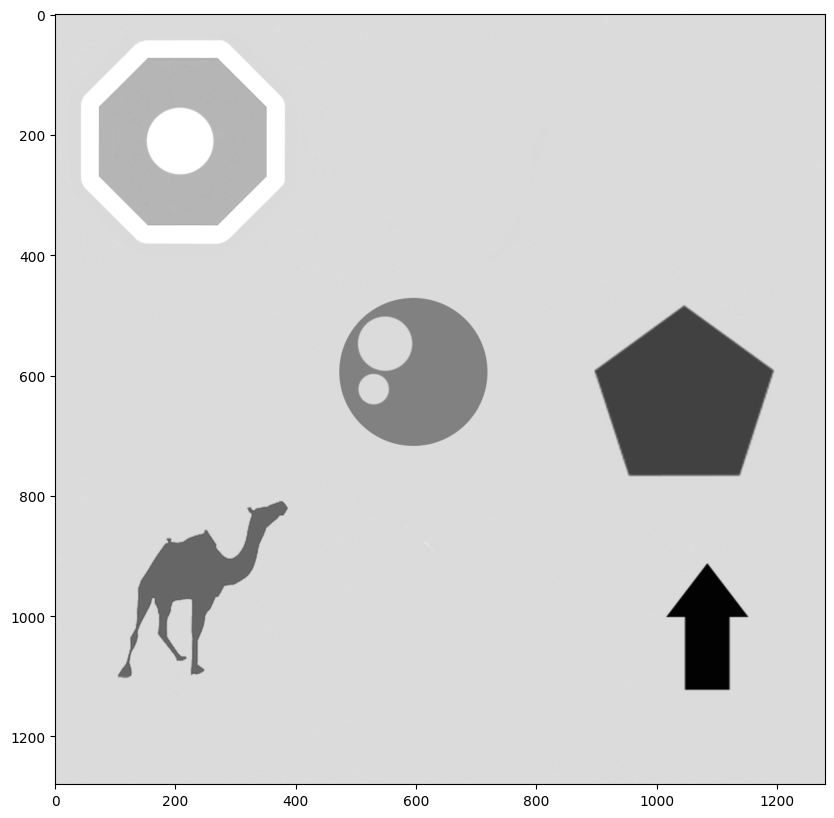

In [6]:
plt.imshow(imageGray)

In [13]:
ret,thresh = cv2.threshold(imageGray,195,255,cv2.THRESH_BINARY_INV)
#This is required to make the contour detection algorithm work swiftly

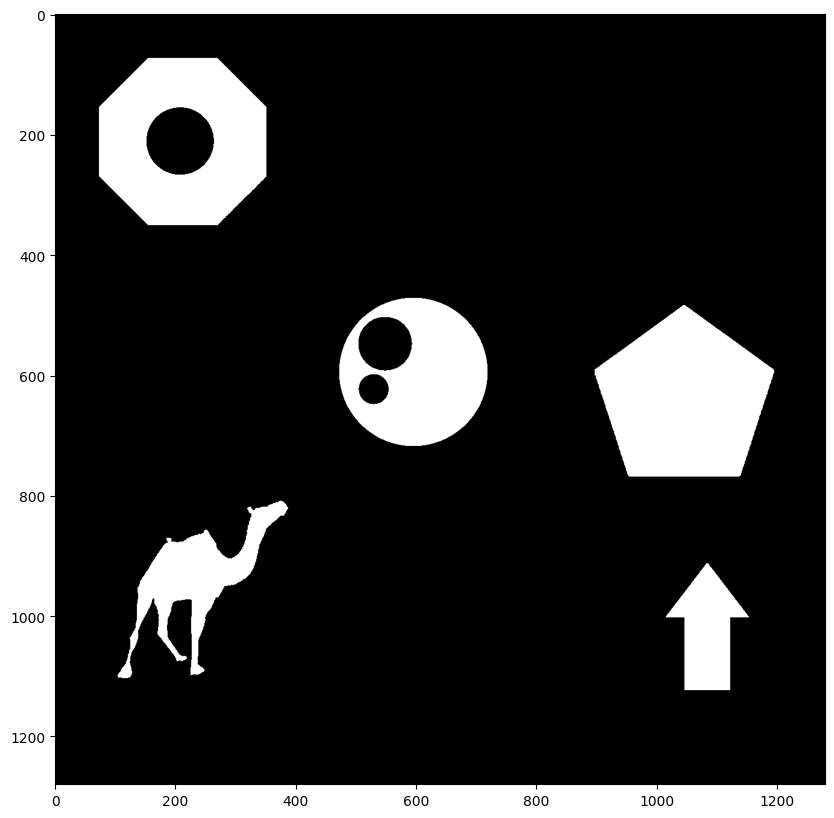

In [14]:
plt.imshow(thresh)

In [15]:
contours,hierarchy = cv2.findContours(thresh,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

In [16]:
print('No of contours '+str(len(contours)))

print('Hierarchy is {}'.format(hierarchy))

No of contours 9
Hierarchy is [[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [ 3  1 -1 -1]
  [ 4  2 -1 -1]
  [ 5  3 -1 -1]
  [ 6  4 -1 -1]
  [ 7  5 -1 -1]
  [ 8  6 -1 -1]
  [-1  7 -1 -1]]]


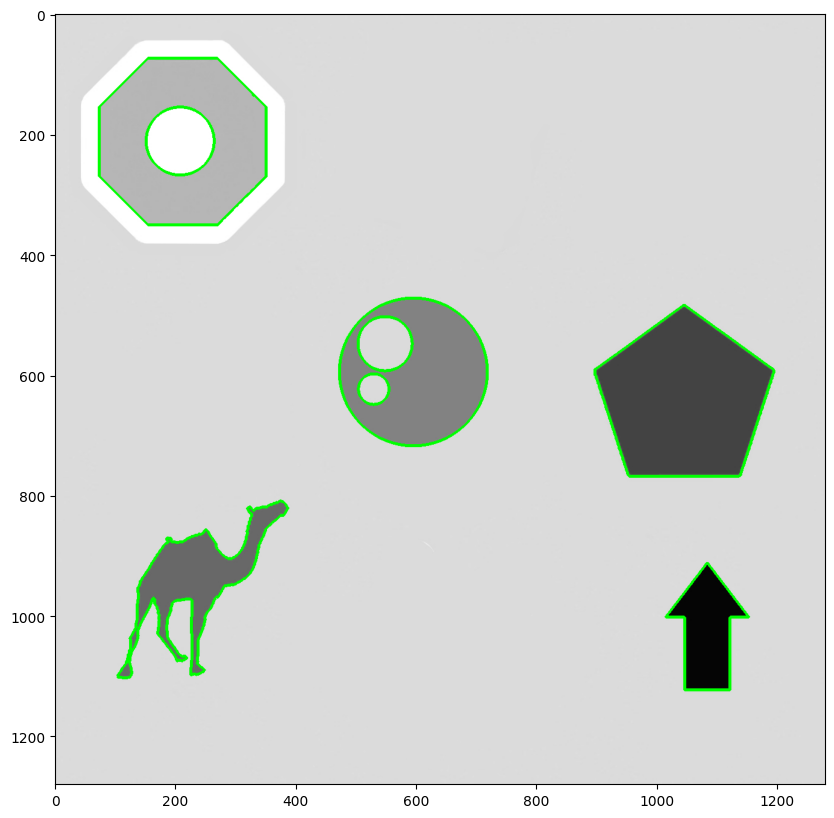

In [18]:
image1 = image.copy()
cv2.drawContours(image1,contours,-1,(0,255,0),3)
plt.imshow(image1[:,:,::-1])

In [19]:
contours2, hierarchy2 = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)

In [20]:
print("Number of contours {}".format(len(contours2)))

print(f"Hierarchy is : {hierarchy2}")

Number of contours 5
Hierarchy is : [[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [ 3  1 -1 -1]
  [ 4  2 -1 -1]
  [-1  3 -1 -1]]]


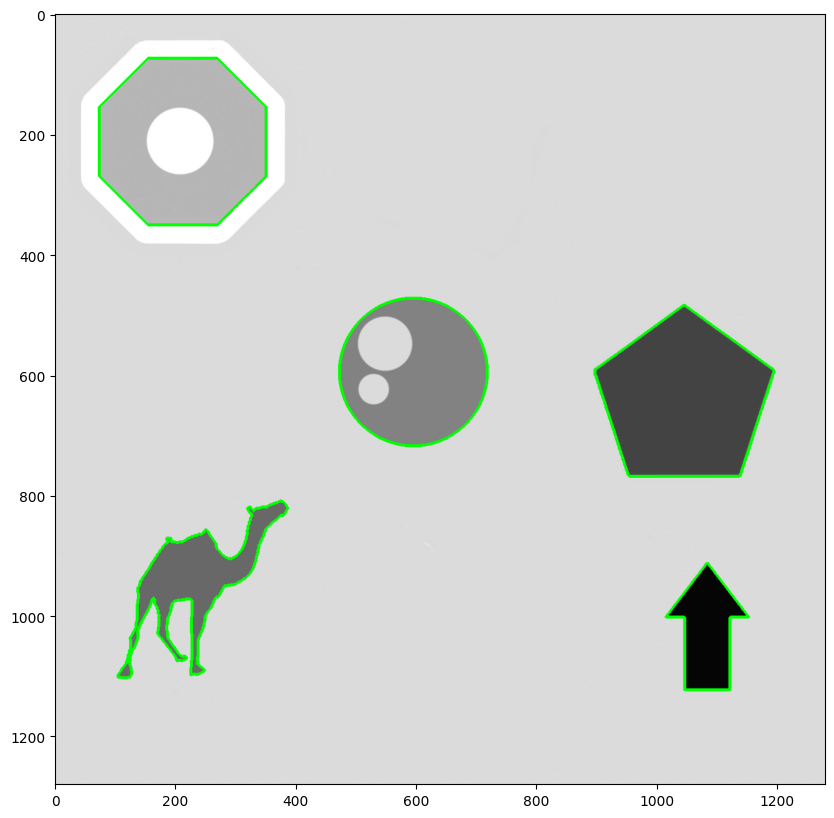

In [22]:
image2 = image.copy()
cv2.drawContours(image2,contours2,-1,(0,255,0),3)
plt.imshow(image2[:,:,::-1])

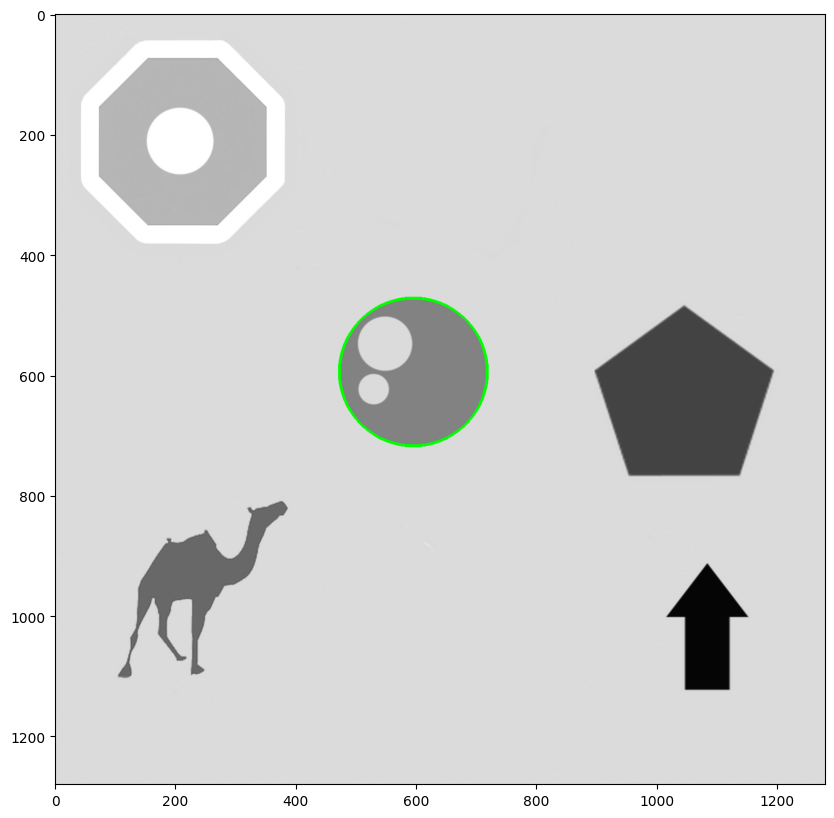

In [26]:
#Drawing Nth contour
image3 = image.copy()

cv2.drawContours(image3,contours2[3],-1,(0,255,0),4)

plt.imshow(image3[:,:,::-1])

In [27]:
#Drawing each contour in different color
def convert_color(hsv):
    'Utility to convert single hsv color tuple into bgr'
    pixel_img = np.uint8([[hsv]])
    return tuple(int(i) for i in cv2.cvtColor(pixel_img,cv2.COLOR_HSV2BGR).flatten())

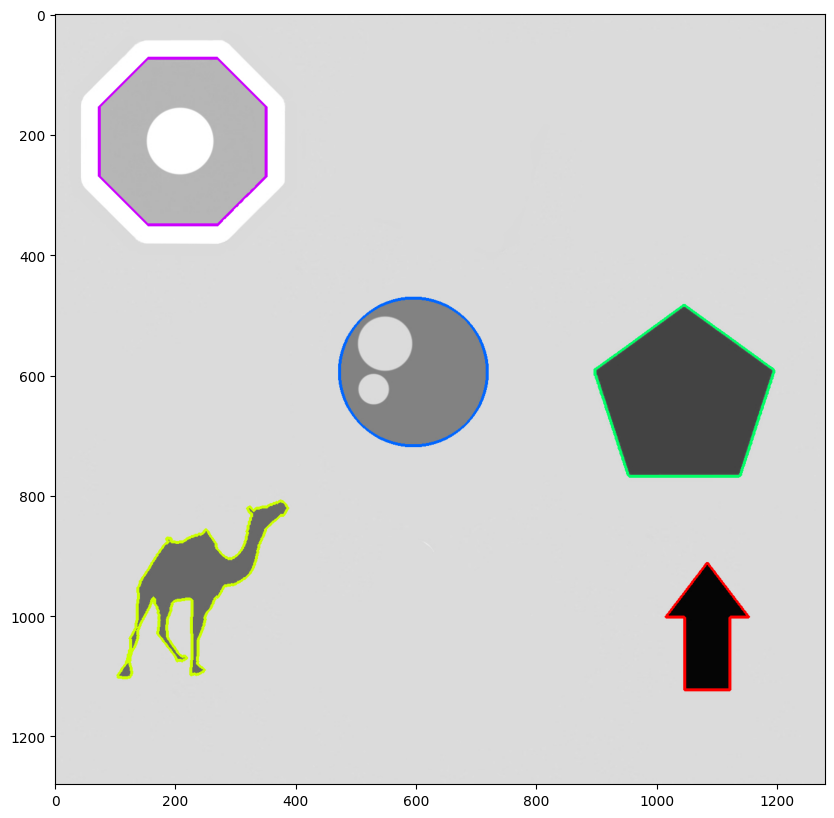

In [33]:
image4 = image.copy()
for i, single_contour in enumerate(contours2):
    hsv = (int( i/len(contours2) *180 ),255,255)
    color = convert_color(hsv)
    cv2.drawContours(image4,contours2,i,color,3)
    plt.imshow(image4[:,:,::-1])

In [51]:
#Centre of Mass
contour3 , hierarchy3 = cv2.findContours(thresh,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

In [52]:
img5 = image.copy()

In [53]:
cv2.drawContours(img5,contour3,-1,(0,0,255),3)

array([[[219, 219, 219],
        [219, 219, 219],
        [219, 219, 219],
        ...,
        [219, 219, 219],
        [219, 219, 219],
        [219, 219, 219]],

       [[219, 219, 219],
        [219, 219, 219],
        [219, 219, 219],
        ...,
        [219, 219, 219],
        [219, 219, 219],
        [219, 219, 219]],

       [[219, 219, 219],
        [219, 219, 219],
        [219, 219, 219],
        ...,
        [219, 219, 219],
        [219, 219, 219],
        [219, 219, 219]],

       ...,

       [[219, 219, 219],
        [219, 219, 219],
        [219, 219, 219],
        ...,
        [219, 219, 219],
        [219, 219, 219],
        [219, 219, 219]],

       [[219, 219, 219],
        [219, 219, 219],
        [219, 219, 219],
        ...,
        [219, 219, 219],
        [219, 219, 219],
        [219, 219, 219]],

       [[219, 219, 219],
        [219, 219, 219],
        [219, 219, 219],
        ...,
        [219, 219, 219],
        [219, 219, 219],
        [219, 219, 219]]

In [54]:
cv2.drawContours(img5,contour3,-1,(0,0,255),3).shape

(1280, 1280, 3)

In [57]:
for count in contours:
    M = cv2.moments(count)
    x = int(round(M["m10"]/M["m00"]))
    y = int(round(M["m01"]/M["m00"]))
    cv2.circle(img5,(x,y),10,(0,0,255),-1)

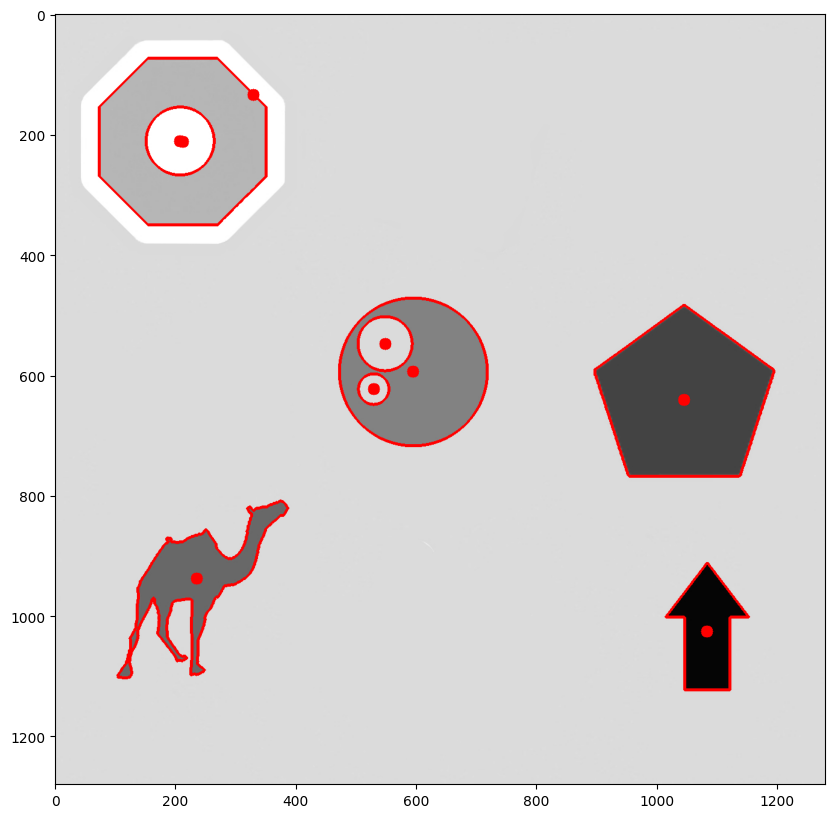

In [58]:
plt.imshow(img5[:,:,::-1])

In [60]:
#Area and Perimeter

for ind, con in enumerate(contour3):
    area = cv2.contourArea(con)
    perimeter = cv2.arcLength(con, True)
    print("Contour #{} has area :{} and perimeter is {}".format(ind+1,area,perimeter))

Contour #1 has area :15310.0 and perimeter is 614.3330389261246
Contour #2 has area :22662.0 and perimeter is 1601.3910390138626
Contour #3 has area :2012.0 and perimeter is 167.68123924732208
Contour #4 has area :6357.5 and perimeter is 298.49242067337036
Contour #5 has area :58960.0 and perimeter is 971.0336074829102
Contour #6 has area :47382.0 and perimeter is 813.6366472244263
Contour #7 has area :10012.5 and perimeter is 374.09039986133575
Contour #8 has area :2.0 and perimeter is 5.656854152679443
Contour #9 has area :63633.5 and perimeter is 930.5067131519318


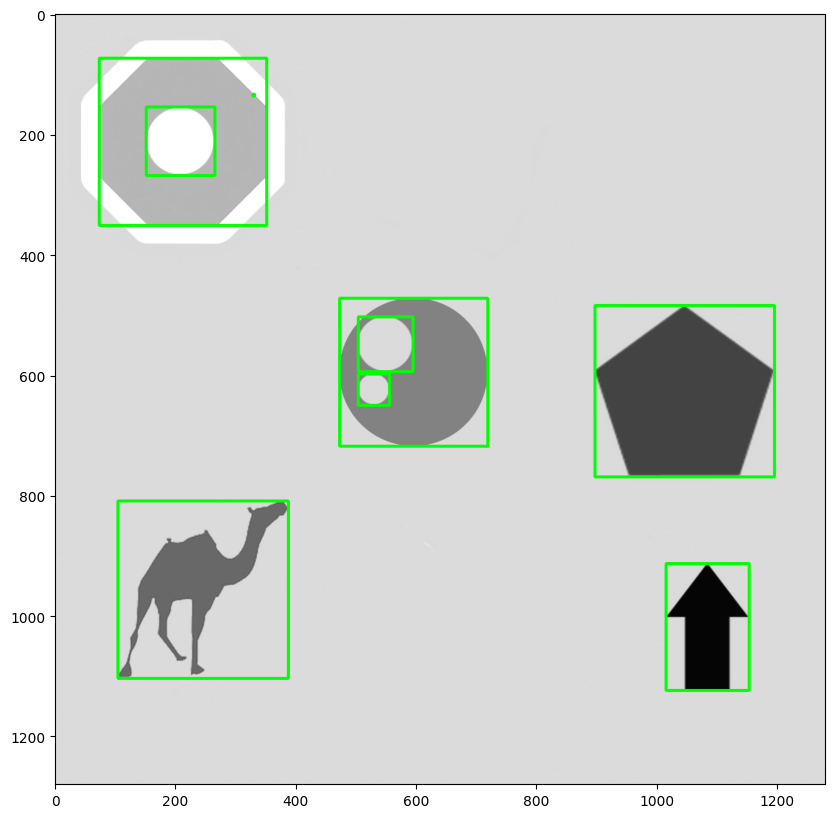

In [61]:
#Bounding box 

image6 = image.copy()
for cnt in contour3:
    x,y,w,h = cv2.boundingRect(cnt)
    cv2.rectangle(image6,(x,y),(x+w,y+h),(0,255,0),4)


plt.imshow(image6[:,:,::-1])

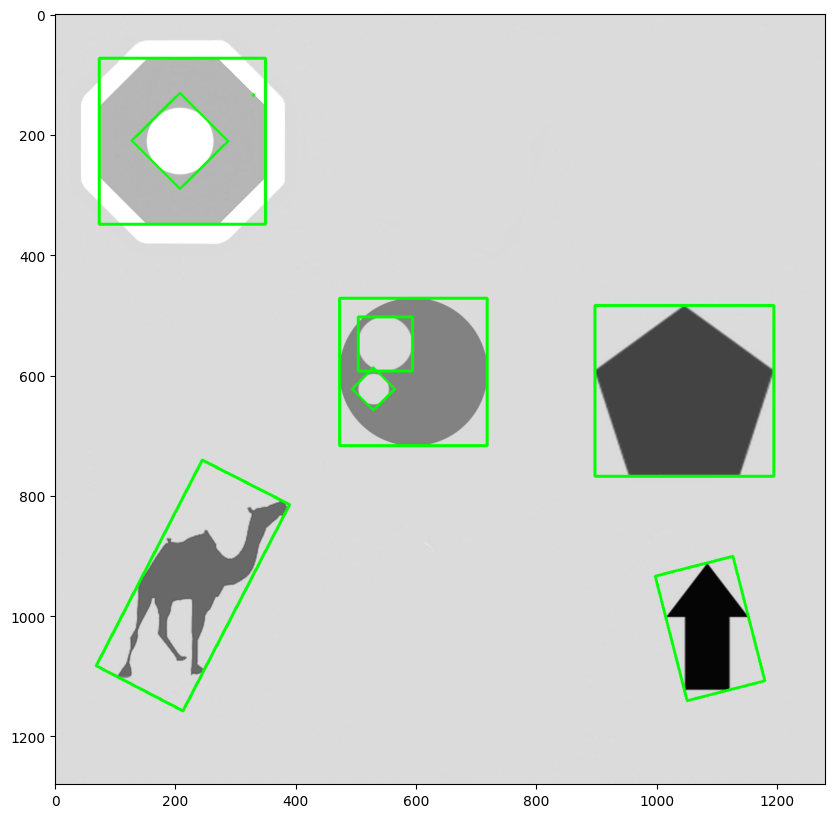

In [62]:
#Minimum area rectangles

img7 = image.copy()

for cnt in contour3:
    box = cv2.minAreaRect(cnt)
    boxPts = np.intp(cv2.boxPoints(box))
    cv2.drawContours(img7,[boxPts],-1,(0,255,0),4)

plt.imshow(img7[:,:,::-1])

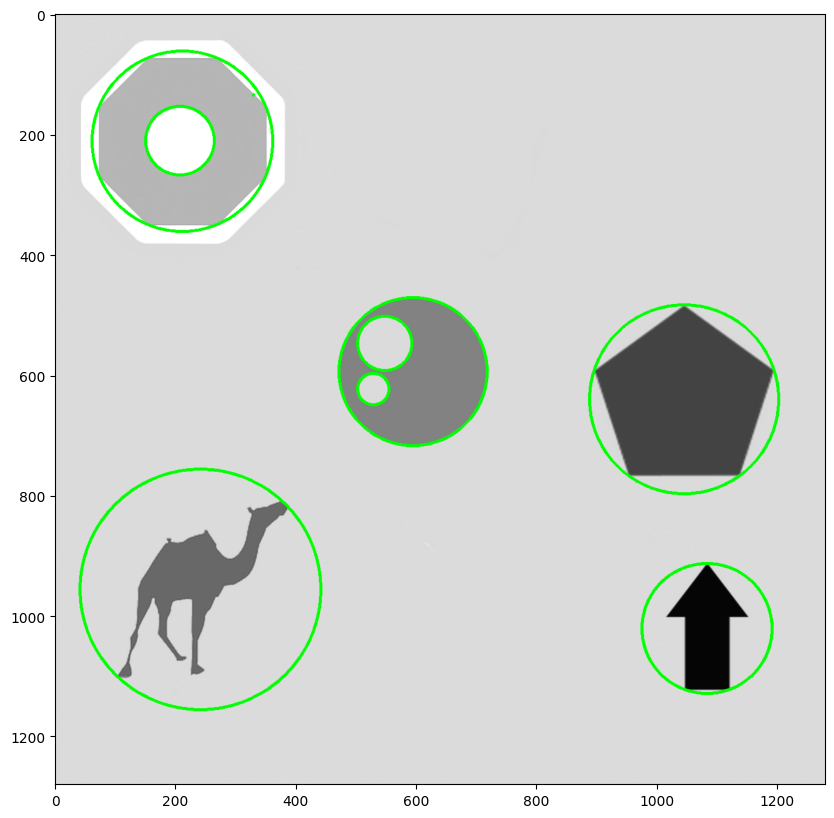

In [64]:
img8 = image.copy()

for cnt in contour3:
    #Circle fitting
    ((c,v),radius) = cv2.minEnclosingCircle(cnt)
    cv2.circle(img8,(int(c),int(v)),int(round(radius)),(0,255,0),4)

plt.imshow(img8[:,:,::-1])

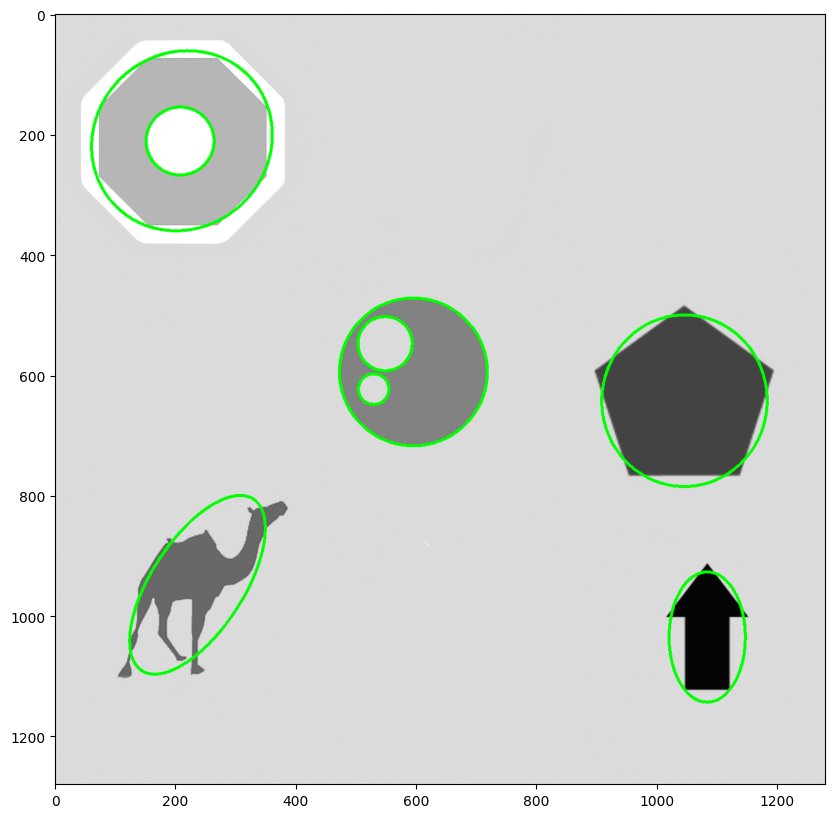

In [66]:
img9 = image.copy()

for cnt in contour3:
    if len(cnt) < 5:
        continue
    ellipse = cv2.fitEllipse(cnt)
    cv2.ellipse(img9,ellipse,(0,255,0),4)

plt.imshow(img9[:,:,::-1])
    